In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load datasets

In [2]:
GDP = pd.read_csv('Final-GDP-dataset.csv')
suicide = pd.read_csv('../datasets/Suicide-rate.csv')
spending =  pd.read_csv('Final-GDP-dataset.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### pre-process spending & GDP datasets

In [3]:
spending

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,...,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996
0,92,"""01000""",Alabama,5,SAGDP11N,1.0,...,All industry total (percent change),Percent change,3.50,...,0,0,0,0,0,0,0,0,0,0
1,93,"""01000""",Alabama,5,SAGDP11N,2.0,...,Private industries,Percentage points,3.29,...,0,0,0,0,0,0,0,0,0,0
2,94,"""01000""",Alabama,5,SAGDP11N,3.0,11,"Agriculture, forestry, fishing and hunting",Percentage points,0.18,...,0,0,0,0,0,0,0,0,0,0
3,95,"""01000""",Alabama,5,SAGDP11N,4.0,111-112,Farms,Percentage points,0.16,...,0,0,0,0,0,0,0,0,0,0
4,96,"""01000""",Alabama,5,SAGDP11N,5.0,113-115,"Forestry, fishing, and related activities",Percentage points,0.01,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86951,87675,"""98000""",Far West,8,SAGDP9S,74.0,...,Military,Millions of chained 1997 dollars,0.00,...,24159.9,24379.5,24578.8,24409.6,24590.5,23667.4,22529.0,21200.0,20008.7,19130.3
86952,87676,"""98000""",Far West,8,SAGDP9S,75.0,...,State and local,Millions of chained 1997 dollars,0.00,...,103766.6,106440.4,111946.9,115192.8,116701.3,117695.0,117865.8,117991.1,121619.9,122546.7
86953,87677,"""98000""",Far West,8,SAGDP9S,76.0,"36, 38",Electronic equipment and instruments 5/,Millions of chained 1997 dollars,0.00,...,20337.5,23995.6,24223.3,24256.5,25540.5,24652.6,25224.3,27109.3,36627.2,48358.9
86954,87678,"""98000""",Far West,8,SAGDP9S,77.0,"60, 61",Depository and nondepository institutions 6/,Millions of chained 1997 dollars,0.00,...,42820.4,43244.3,43763.3,48479.0,49381.1,40443.3,41888.3,40459.8,38577.9,36451.6


In [4]:
# Drop rows with irrelevant totals 
spending = spending.drop(spending[(spending.GeoName == 'New England') |\
                                  (spending.GeoName == 'District of Columbia') |\
                                  (spending.GeoName == 'Great Lakes') |\
                                  (spending.GeoName == 'Plains') |\
                                  (spending.GeoName == 'Southeast') |\
                                  (spending.GeoName == 'Southwest') |\
                                  (spending.GeoName == 'Far West') |\
                                  (spending.GeoName == 'Rocky Mountain') |\
                                  (spending.GeoName == 'Mideast')
                                 ].index)

GDP = GDP.drop(GDP[(GDP.GeoName == 'New England') |\
                                  (GDP.GeoName == 'District of Columbia') |\
                                  (GDP.GeoName == 'Great Lakes') |\
                                  (GDP.GeoName == 'Plains') |\
                                  (GDP.GeoName == 'Southeast') |\
                                  (GDP.GeoName == 'Southwest') |\
                                  (GDP.GeoName == 'Far West') |\
                                  (GDP.GeoName == 'Rocky Mountain') |\
                                  (GDP.GeoName == 'Mideast')
                                 ].index)

# Drop rows with irrelevant units 
spending = spending.drop(spending[spending.Unit != 'Thousands of dollars'].index)
GDP = GDP.drop(GDP[GDP.Unit != 'Thousands of dollars'].index)

# Drop irrelevant columns 
spending = spending.drop(['Unnamed: 0', 'GeoFIPS', 'LineCode', 'TableName', 'IndustryClassification'], axis=1)
GDP = GDP.drop(['Unnamed: 0', 'GeoFIPS', 'LineCode', 'TableName', 'IndustryClassification'], axis=1)

In [5]:
spending = spending.replace({'GeoName' : {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
        'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
        'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
        }})


GDP = GDP.replace({'GeoName' : {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
        'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
        'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
        }})

### Analysis GDP & spending

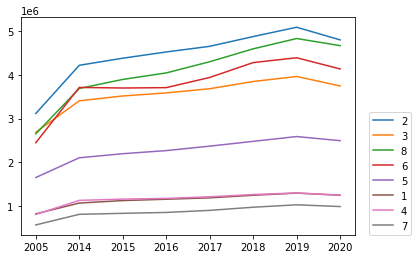

In [6]:
# spending & GDP per region per year
cols = ['2005', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
sp_avr = spending.groupby('Region').mean()[cols]
GDP_avr = GDP.groupby('Region').mean()[cols]


'''
which region spent the most?

NOTE: spending decline for all regions after 2019
'''
sp_avr.nlargest(n=8,columns=cols).T.plot()
plt.legend(loc=(1.04, 0));

In [7]:
'''
What is the main spending category per region?
  -->get top 20 spending categories per region

'''
sp_cat = spending.groupby(['Region','Description']).mean()[cols]
top20_per_region = pd.DataFrame()

for i in range(1,9):   
    '''
    NOTE: n=23 instead of 20 beacuse
    the top 3 spendings are totals 
    of different industries.  
        ---> exclude top 3
    '''
    top20 = sp_cat.loc[i].nlargest(n=23,columns=cols)
    top20 = top20.index[3:].to_list()
    top20_per_region[f'region {i}'] = top20

top20_per_region.head()

,region 1,region 2,region 3,region 4,region 5,region 6,region 7,region 8
0,"Finance, insurance, real estate, rental, and...","Finance, insurance, real estate, rental, and...",Private goods-producing industries 2/,Private goods-producing industries 2/,Private goods-producing industries 2/,Private goods-producing industries 2/,Private goods-producing industries 2/,Private goods-producing industries 2/
1,Manufacturing and information,Real estate and rental and leasing,Manufacturing and information,"Finance, insurance, real estate, rental, and...","Finance, insurance, real estate, rental, and...",Manufacturing and information,"Finance, insurance, real estate, rental, and...","Finance, insurance, real estate, rental, and..."
2,Private goods-producing industries 2/,Manufacturing and information,"Finance, insurance, real estate, rental, and...",Manufacturing and information,Manufacturing and information,"Finance, insurance, real estate, rental, and...",Manufacturing and information,Manufacturing and information
3,Real estate and rental and leasing,Real estate,Manufacturing,Manufacturing,Trade,Trade,Trade,Trade
4,Real estate,Trade,Trade,Trade,Manufacturing,Manufacturing,Real estate and rental and leasing,Real estate and rental and leasing


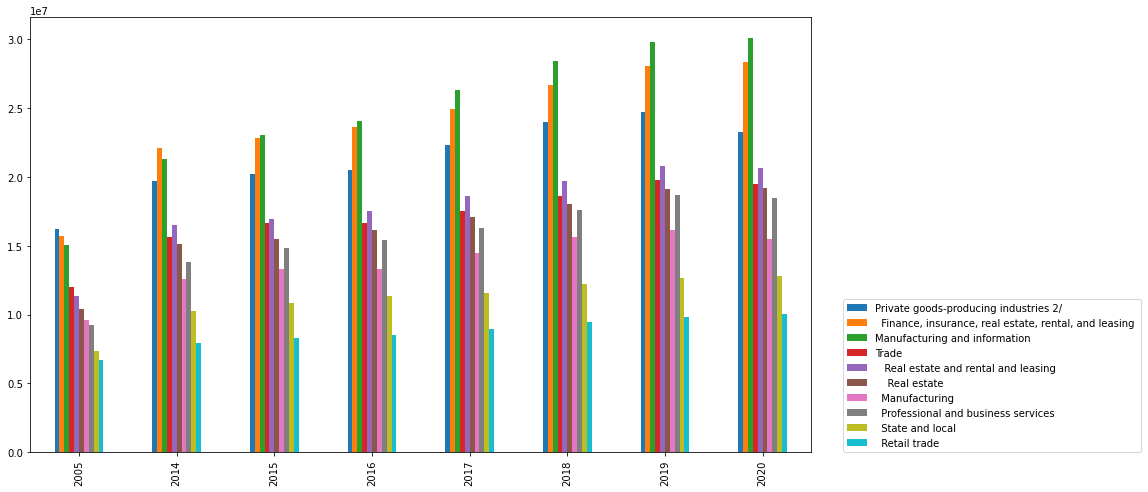

In [21]:
'''
plot top 10 spending categories per year 
for a specific region
  --> Region=8
'''
top10 = sp_cat.loc[8].nlargest(n=13,columns=cols)
top10.loc[top10.index[3:]].T.plot.bar(figsize=(14,8))
plt.legend(loc=(1.04, 0));

### pre-process suicide dataset

In [14]:
# extract region numbers column from spending data set & add it to suicide dataset
regions = spending[['GeoName','Region']]
df2 = pd.merge(suicide, regions, left_on='STATE', right_on='GeoName')
df2.drop('GeoName', axis=1,inplace=True)
df2 = df2.drop_duplicates()

sui_avr = df2.groupby(['Region', 'YEAR']).mean().unstack(1)
sui_avr
regions

,GeoName,Region
16016,AL,5
16017,AL,5
16018,AL,5
16019,AL,5
16020,AL,5
...,...,...
65927,WY,7
65928,WY,7
65929,WY,7
65930,WY,7


### Analysis Suicide Rate & Economical Factors

### Analysis GDP & spending